```{contents}
```

# Assumptions

1. **Clusters are dense regions separated by sparse regions**

   * DBSCAN assumes that true clusters have higher point density compared to noise and other clusters.
   * Noise points are isolated in low-density areas.

2. **Distance metric meaningfully captures similarity**

   * DBSCAN typically uses Euclidean distance.
   * Assumes that the chosen distance metric reflects closeness in the data space.
   * If features are on different scales, normalization is required.

3. **Global density parameters apply to all clusters**

   * A single $\epsilon$ (neighborhood radius) and `minPts` (minimum points) are used for the whole dataset.
   * Assumes all clusters have similar density.
   * Struggles if dataset contains clusters with widely varying densities.

4. **Data lies in a metric space**

   * The data should allow computation of distances that obey metric properties (non-negativity, identity, symmetry, triangle inequality).

5. **Sufficient data density**

   * For DBSCAN to identify meaningful clusters, enough points must exist in each dense region.
   * Sparse data may lead to many points being labeled as noise.

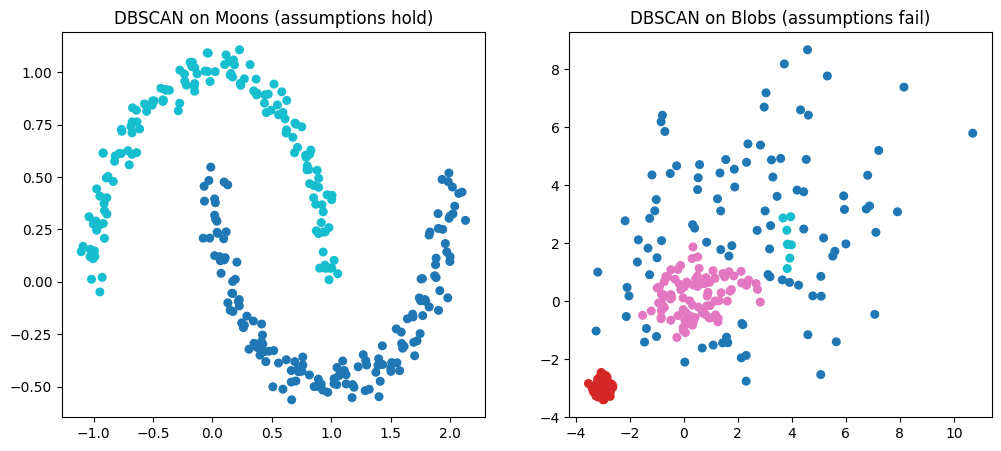

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN

# Generate datasets
X1, _ = make_moons(n_samples=300, noise=0.05, random_state=42)  # Arbitrary shape, good for DBSCAN
X2, _ = make_blobs(n_samples=300, centers=[(-3, -3), (0, 0), (3, 3)], cluster_std=[0.2, 1.0, 2.5], random_state=42)  # Varying densities

# Apply DBSCAN
db1 = DBSCAN(eps=0.3, min_samples=5).fit(X1)
labels1 = db1.labels_

db2 = DBSCAN(eps=0.5, min_samples=5).fit(X2)
labels2 = db2.labels_

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: moons dataset
axs[0].scatter(X1[:, 0], X1[:, 1], c=labels1, cmap="tab10", s=30)
axs[0].set_title("DBSCAN on Moons (assumptions hold)")

# Subplot 2: blobs with varying density
axs[1].scatter(X2[:, 0], X2[:, 1], c=labels2, cmap="tab10", s=30)
axs[1].set_title("DBSCAN on Blobs (assumptions fail)")

plt.show()
